In [1]:
#import libraries

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib
import os

#import data

In [3]:
#define path to prepared data folder
preparedDataPath= r'C:\Users\user\nycpayrollanalysis\02 Data\prepareddata'

In [3]:
df=pd.read_csv(os.path.join(preparedDataPath,'payroll_clean.csv'))

In [5]:
df.head()

,Unnamed: 0,Fiscal Year,Payroll Number,Agency Name,Agency Start Date,Work Location Borough,Title Description,Leave Status as of June 30,Base Salary,Pay Basis,Regular Hours,Regular Gross Paid,OT Hours,Total OT Paid,Total Other Pay,employee_id
0,0,2020,17.0,OFFICE OF EMERGENCY MANAGEMENT,08/10/2015,BROOKLYN,EMERGENCY PREPAREDNESS MANAGER,ACTIVE,86005.0,per Annum,1820.0,84698.21,0.0,0.0,0.0,emgiazxy
1,1,2020,17.0,OFFICE OF EMERGENCY MANAGEMENT,09/12/2016,BROOKLYN,EMERGENCY PREPAREDNESS MANAGER,ACTIVE,86005.0,per Annum,1820.0,84698.21,0.0,0.0,0.0,qcekinkp
2,2,2020,17.0,OFFICE OF EMERGENCY MANAGEMENT,02/22/2016,BROOKLYN,EMERGENCY PREPAREDNESS MANAGER,ACTIVE,86005.0,per Annum,1820.0,84698.21,0.0,0.0,0.0,vihcvktl
3,3,2020,17.0,OFFICE OF EMERGENCY MANAGEMENT,09/16/2013,BROOKLYN,EMERGENCY PREPAREDNESS MANAGER,ACTIVE,86005.0,per Annum,1820.0,84698.21,0.0,0.0,0.0,ototwwxb
4,4,2020,17.0,OFFICE OF EMERGENCY MANAGEMENT,04/30/2018,BROOKLYN,EMERGENCY PREPAREDNESS MANAGER,ACTIVE,86005.0,per Annum,1820.0,84698.21,0.0,0.0,0.0,oskpiihm


#identify columns suitable for exploratory visual analysis
Payroll Number
Agency Name
Work Location Borough
Title Description
Leave Status as of June 30
Base Salary
Regular Hours
Regular Gross Paid
OT Hours
Total OT Paid
Total Other Pay

In [3]:
goodcols=["Base Salary","Regular Hours","Regular Gross Paid","OT Hours","Total OT Paid","Total Other Pay"]
df=pd.read_csv(os.path.join(preparedDataPath,'payroll_full_uniqueid.csv'),usecols=goodcols)

In [4]:
df.head()

,Base Salary,Regular Hours,Regular Gross Paid,OT Hours,Total OT Paid,Total Other Pay
0,86005.0,1820.0,84698.21,0.0,0.0,0.0
1,86005.0,1820.0,84698.21,0.0,0.0,0.0
2,86005.0,1820.0,84698.21,0.0,0.0,0.0
3,86005.0,1820.0,84698.21,0.0,0.0,0.0
4,86005.0,1820.0,84698.21,0.0,0.0,0.0


In [13]:
# Create a correlation matrix using pandas

df.corr()

,Base Salary,Regular Hours,Regular Gross Paid,OT Hours,Total OT Paid,Total Other Pay
Base Salary,1.000000,0.375512,0.853796,0.216569,0.242599,0.436661
Regular Hours,0.375512,1.000000,0.474436,0.577087,0.534666,0.499903
Regular Gross Paid,0.853796,0.474436,1.000000,0.299417,0.352967,0.468208
OT Hours,0.216569,0.577087,0.299417,1.000000,0.922960,0.502556
Total OT Paid,0.242599,0.534666,0.352967,0.922960,1.000000,0.559296
Total Other Pay,0.436661,0.499903,0.468208,0.502556,0.559296,1.000000


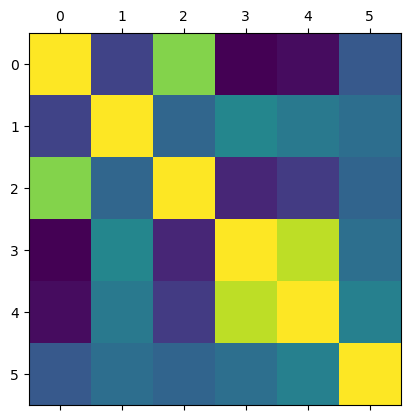

In [14]:
# Create a correlation heatmap using matplotlib

plt.matshow(df.corr())
plt.show()

Text(0.5, 1.0, 'Correlation Matrix')

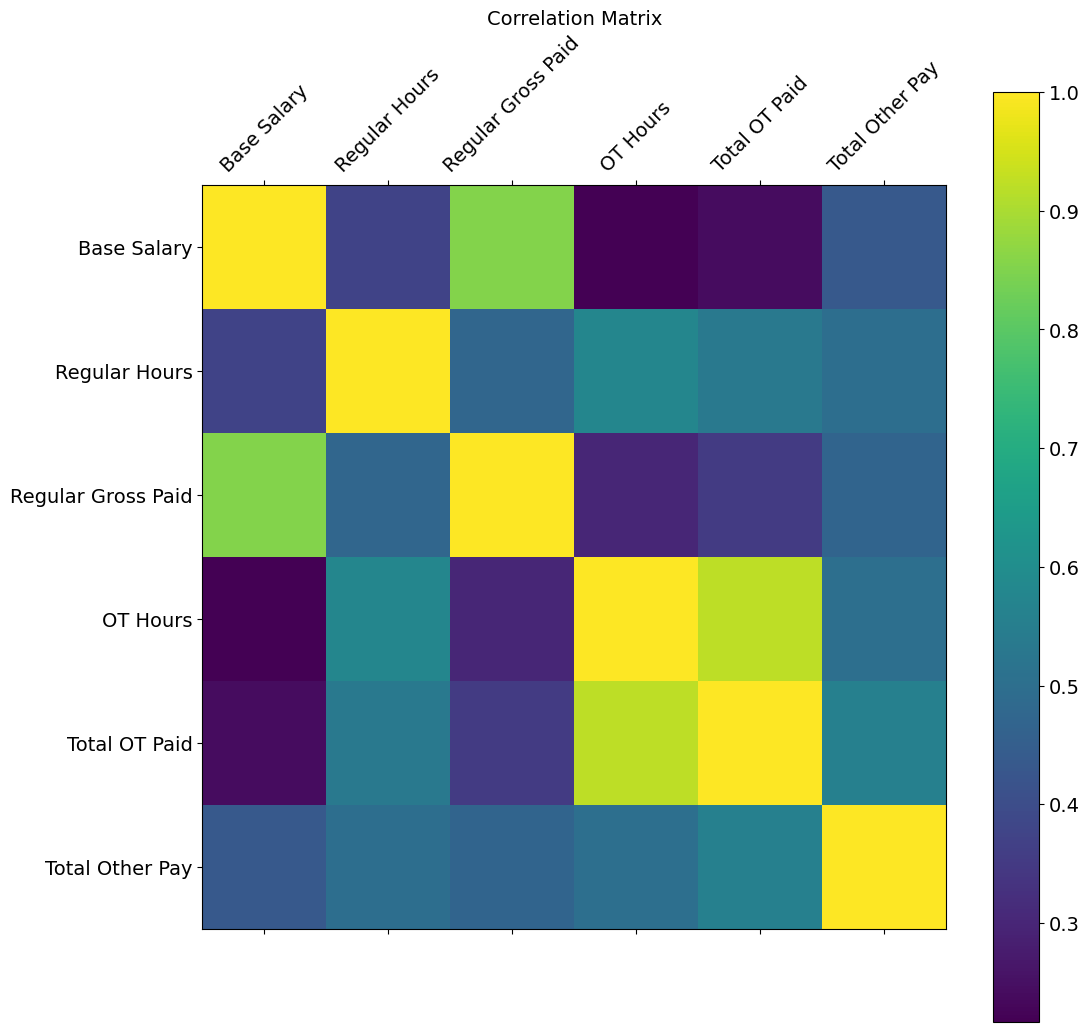

In [15]:
# Add labels, a legend, and change the size of the heatmap

f = plt.figure(figsize=(12, 12)) # figure size 
plt.matshow(df.corr(), fignum=f.number) # type of plot
plt.xticks(range(df.shape[1]), df.columns, fontsize=14, rotation=45) # x axis labels
plt.yticks(range(df.shape[1]), df.columns, fontsize=14) # y axis labels
cb = plt.colorbar() # add a colour legend (called colorbar)
cb.ax.tick_params(labelsize=14) # add font size
plt.title('Correlation Matrix', fontsize=14) # add title

#the meaning of the correlation coefficients:
To read the coefficients there are two dimensions to understand
1. on an absolute value between 0 and 1 - the closer the coefficient is to 0 shows there is no relationship, the closer the value is to 1 shows there is a strong relationship between the variables.
2. negative vs. positive - if the coefficient is positive then there is a direct relationship: as one increases the other will increase too.  if the coefficient is negative then there is an inverse relationship: as one increases the other will decrease.

The correlation matrix of NYC Payroll Data shows
- The strongest positive relationships are between Base Salary and Regular Gross Paid, or between Total OT Paid and OT Hours.
This makes sense because as the Base Salary increases the Regular Gross Paid will increase too, as well, as the number of over time hours worked increases, the amount of over time paid will increase too.
- There is no relationship between OT Hours and Total OT Paid to Base Salary or Regular Gross Paid - this may imply that employees with regular salary are not eligible to earn overtime, or that their ability to earn overtime hours has nothing to do with their base salary. (they are paid fixed salary regardless of number of hours worked).
- There is a mild relationship between Total Other Pay and all of the other variables, which may imply that simply by being a government employee the employees earn other benefits but not necessarily according to specific rules.
- There are no variables with negative relationships.  All variables have positive relationships in this data set.

#create scatterplots of variables with strongest correlations: Base Salary & Regular Gross Paid, Total OT Paid & OT Hours


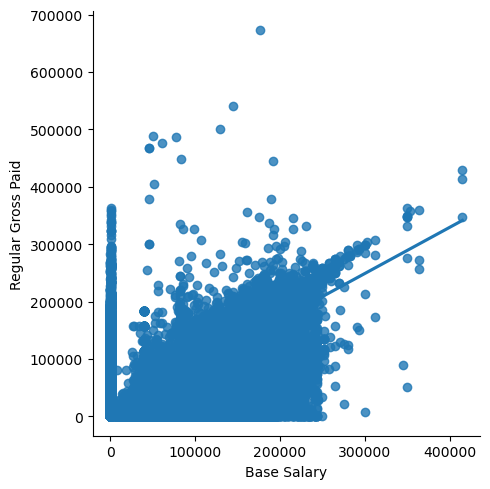

In [5]:
sns.lmplot(x = 'Base Salary', y = 'Regular Gross Paid', data = df)

#Scatterplot observations
This scatterplot shows the trend that as Base Salary increases, Regular Gross Paid increases too.  This is especially clear in the data for Base Salary starting at about 250000, there are a group of plots that move up and to the right.  This indicates that generally, Base Salary and Regular Gross Paid are usually just about the same amount.

There are also a large number of plots that have 0.0 values for one variable, but another number for the other variable.

The trend line also reflects the strong positive relationship between these two variables.

There are also a few outliers, which may deserve individual review.  For instance the plot at Regular Gross Paid at 700000, but Base Salary is only 200000.

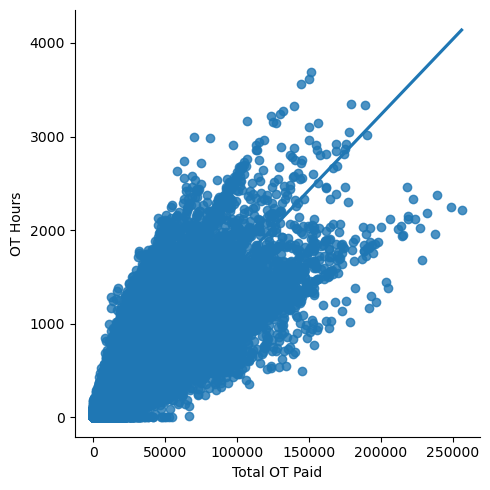

In [6]:
sns.lmplot(x = 'Total OT Paid', y = 'OT Hours', data = df)

#scatterplot observations
This scatterplot shows a very strong relationship between OT Hours and Total OT Paid.  All plots are very close to the central trend line.  There are no significant outliers. 

There seem to be a group of plots that have 0.0 OT Hours, but a value up to 50000 for Total OT Paid.  This may imply there is a population in this dataset who did not work overtime, yet were paid for overtime hours.  This may deserve investigation.

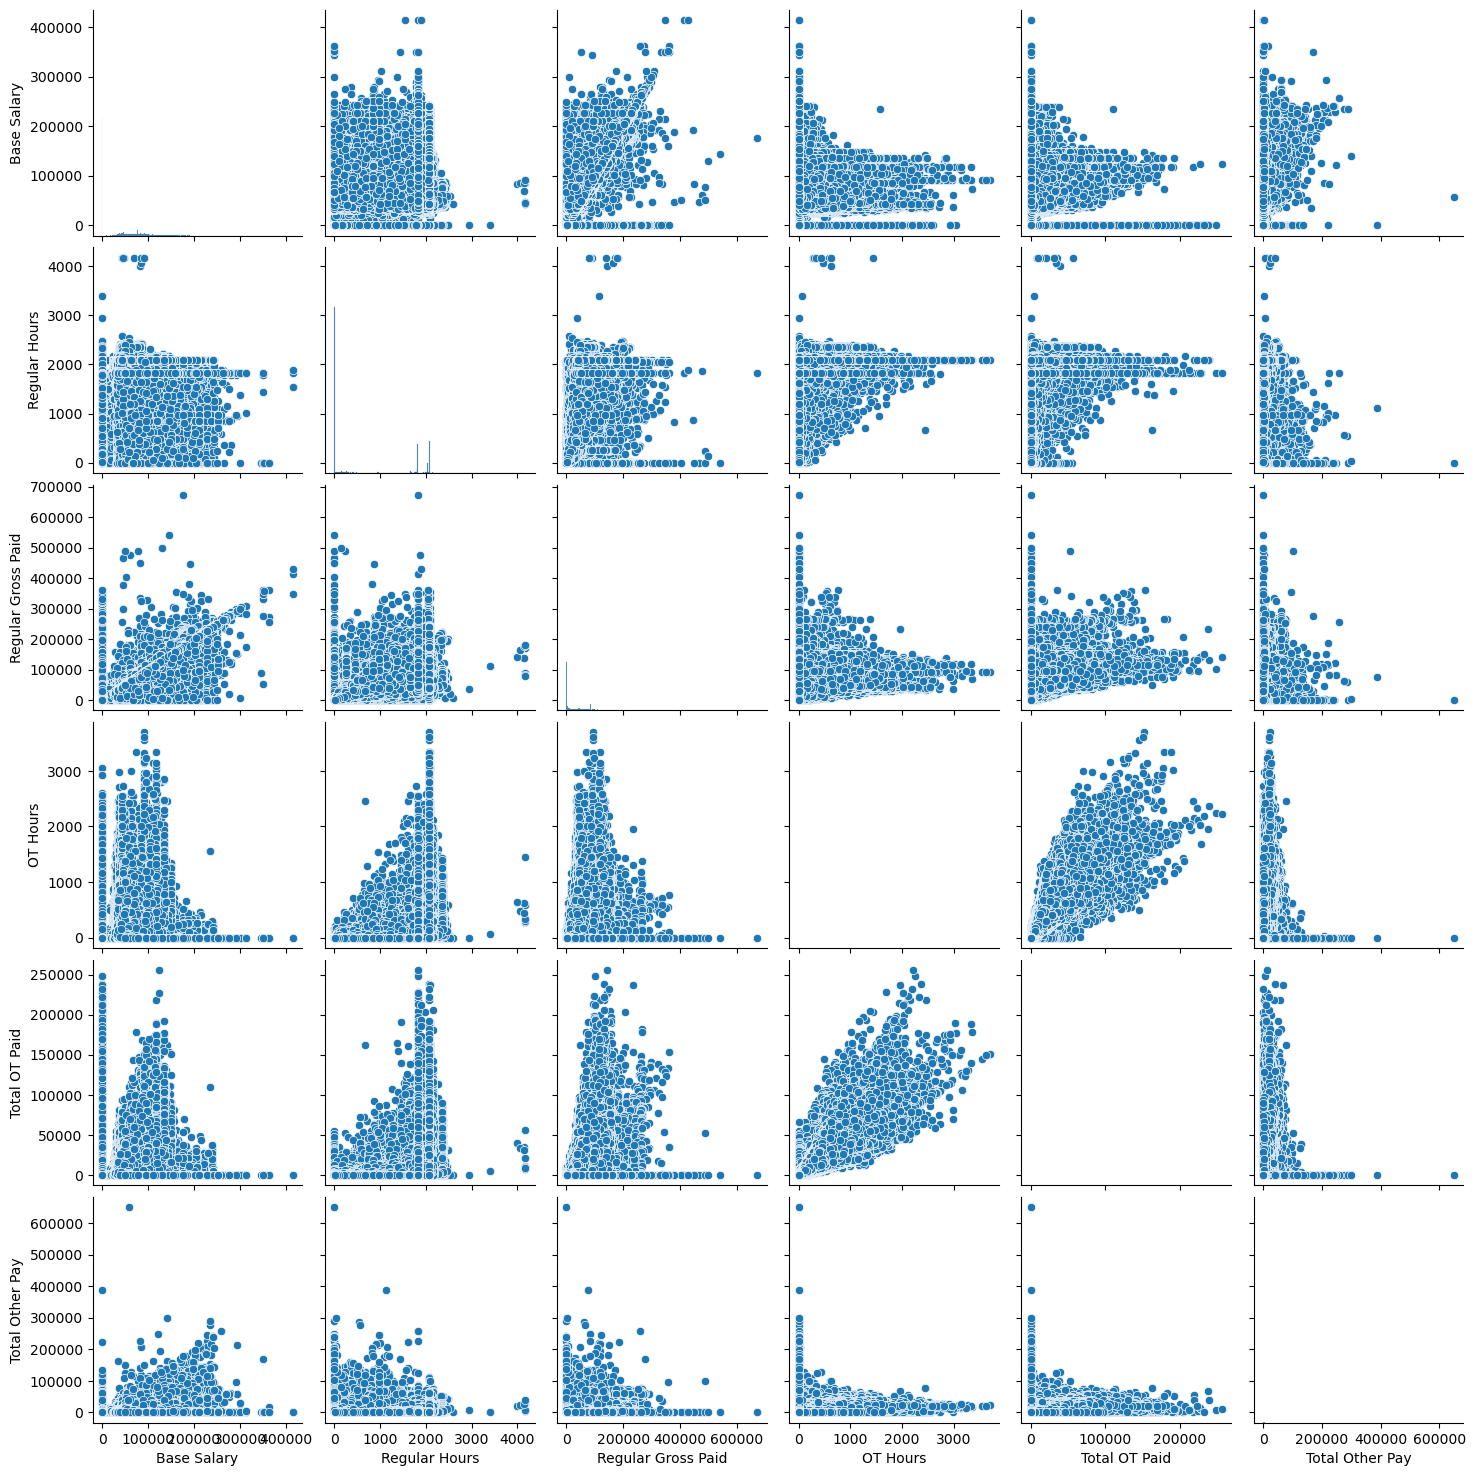

In [7]:
## Create a pair plot 

g = sns.pairplot(df)

#Pair plot observations
Overall, this pair plot shows the same relationships as the correlation matrix, where OT Hours & Total OT Paid, as well as, Regular Hours & Regular Gross Paid have the strongest relationships depicted by the shape of the scatterplot.
Several charts also show no relationship, where the plots generally form a horizontal line or a vertical line.  These include:
OT Hours & Regular Hours
Base Salary & Total OT Paid
All of the Total Other Pay charts show the same basic behavior, that there Total Other Pay is not dependent on how much Salary or Overtime the employee earns, and generally, Total Other Pay is not very large.

Given the variables with no relationship, such as Base Salary and Total OT Paid, it may be worth investigating other indicators of what drives Base Salary and Overtime, such as specific departments, Job Titles, or amount of time employed.

#create catagorical plot
use Base Salary

<Axes: xlabel='Base Salary', ylabel='Count'>

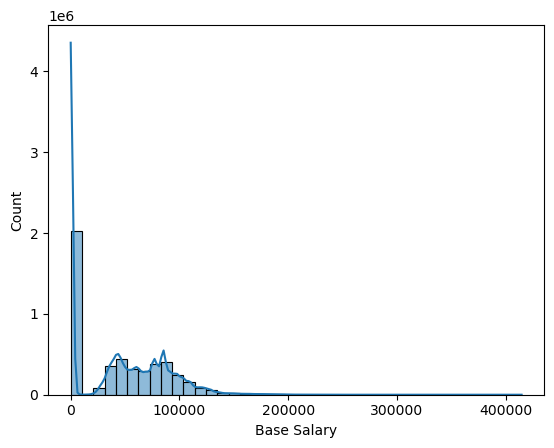

In [6]:
sns.histplot(df['Base Salary'], bins = 40, kde = True)

#create base salary flag

In [4]:
df.loc[df['Base Salary'] <= 2000, 'basesalary_flag'] = 'NoSalary'

In [5]:
df.loc[(df['Base Salary'] > 2000) & (df['Base Salary'] < 50000), 'basesalary_flag'] = 'Salaryto50K'

In [6]:
df.loc[(df['Base Salary'] >= 50000) & (df['Base Salary'] < 100000), 'basesalary_flag'] = 'Salary50Kto100K'

In [7]:
df.loc[(df['Base Salary'] >= 100000) & (df['Base Salary'] < 150000), 'basesalary_flag'] = 'Salary100Kto150K'

In [8]:
df.loc[df['Base Salary'] >= 150000, 'basesalary_flag'] = 'SalaryOver150K'

In [9]:
df['basesalary_flag'].value_counts(dropna = False)

NoSalary            2029437
Salary50Kto100K     1603095
Salaryto50K          822587
Salary100Kto150K     418371
SalaryOver150K        41847
Name: basesalary_flag, dtype: int64

In [26]:
df['Base Salary'].value_counts(dropna = False)

33.18        803905
1.00         321821
85292.00     125243
110.29       102759
76488.00      53864
              ...  
96728.00          1
36032.00          1
83611.00          1
93609.00          1
120388.00         1
Name: Base Salary, Length: 102820, dtype: int64

In [ ]:
# Create a categorical plot in seaborn using the price categories created above

sns.set(style="ticks")
g = sns.catplot(x="Regular Hours", y="OT Hours", hue="basesalary_flag", data=df)

#This Categorical Plot helps answer the question
Does Base Salary indicate how many Regular Hours vs. Overtime Hours an employee will work?
In otherwords, are there employees with no base salary or very low base salary who only earn overtime hours?
Alternatively, How many regular hours do employees work based on Base Salary?

Interesting observation:  The largest group of employees have either no base salary, or a base salary under 2000.  Is this accurate, or is it because it is open source data?

In [13]:
df_small=df.sample(n=5000) 

In [14]:
df_small.shape

(5000, 7)

In [17]:
df_small["basesalary_flag"].value_counts(dropna=False)

NoSalary            2072
Salary50Kto100K     1640
Salaryto50K          792
Salary100Kto150K     453
SalaryOver150K        43
Name: basesalary_flag, dtype: int64

In [18]:
df_small['Regular Hours'].value_counts(dropna=False)

0.00       2790
1825.00     259
2080.00     247
1820.00     238
2085.72     220
           ... 
2002.60       1
2076.57       1
177.33        1
1520.38       1
228.57        1
Name: Regular Hours, Length: 711, dtype: int64

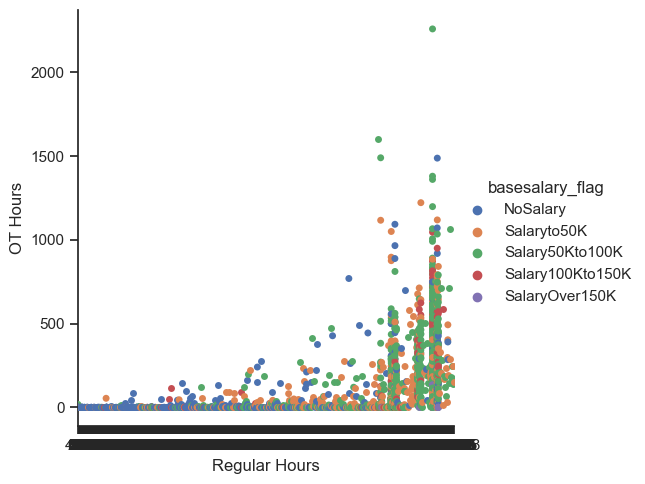

In [15]:
sns.set(style="ticks")
g = sns.catplot(x="Regular Hours", y="OT Hours", hue="basesalary_flag", data=df_small)

# Observations on the Categorical Plot
1- in order to create this plot, i used a subset of 5000 random rows, approx 0,1% of the dataset, which is statistically significant sample population.  The total dataset is too large and processing time prevents rendering this chart on the total dataset. (I tried multiple times for approx 10hours total).

2- The green dots represent the group earning Base Salary 50K to 100K and this group shows the most distinctive behavior.  There are 3 spikes of overtime earned at the upper end of the Regular Hours scale.  This implies there are categories of employees who are set to work certain amounts of Regular Hours, but also, earn overtime hours.  Additionally, it appears that as the Regular Hours increase, the number of OT Hours increase too.

3- The blue dots represent employees with No Salary, and generally, they also earn no OT Hours.  This is most likely due to the dataset not accurately including their salary and hours information.

4- Generally, this categorical plot indicates there is a positive correlation between Regular Hours and OT Hours.  The data follows an up-and-to-the-right pattern.  However, this correlation did not appear in the correlation matrix or pair plot chart.

#Consider questions generated in previous exercise

-	Do employees receive the same pay in all 5 boroughs?

To answer these questions
- create statistical baseline statistics on Regular Gross Paid
- Segment audience by Borough Name
- 

In [5]:
#import data
goodcols=["Work Location Borough","Regular Gross Paid"]
df=pd.read_csv(os.path.join(preparedDataPath,'payroll_clean.csv'),usecols=goodcols)

In [6]:
df.head()

,Work Location Borough,Regular Gross Paid
0,BROOKLYN,84698.21
1,BROOKLYN,84698.21
2,BROOKLYN,84698.21
3,BROOKLYN,84698.21
4,BROOKLYN,84698.21


In [7]:
df['Regular Gross Paid'].describe()

count    4.915337e+06
mean     4.166508e+04
std      3.953947e+04
min      0.000000e+00
25%      3.131120e+03
50%      3.518840e+04
75%      7.363837e+04
max      6.723089e+05
Name: Regular Gross Paid, dtype: float64

In [8]:
#use groupby, agg, transform to query data
#df['employee sum']=df.groupby('Work Location Borough')['employee_id'].transform('count')

df['RGP_max']=df.groupby('Work Location Borough')['Regular Gross Paid'].transform('max')

In [9]:
df.head()

,Work Location Borough,Regular Gross Paid,RGP_max
0,BROOKLYN,84698.21,500000.0
1,BROOKLYN,84698.21,500000.0
2,BROOKLYN,84698.21,500000.0
3,BROOKLYN,84698.21,500000.0
4,BROOKLYN,84698.21,500000.0


In [10]:
df['RGP_min']=df.groupby('Work Location Borough')['Regular Gross Paid'].transform('min')

In [11]:
df['RGP_mean']=df.groupby('Work Location Borough')['Regular Gross Paid'].transform('mean')

In [12]:
df.head()

,Work Location Borough,Regular Gross Paid,RGP_max,RGP_min,RGP_mean
0,BROOKLYN,84698.21,500000.0,0.0,53987.193955
1,BROOKLYN,84698.21,500000.0,0.0,53987.193955
2,BROOKLYN,84698.21,500000.0,0.0,53987.193955
3,BROOKLYN,84698.21,500000.0,0.0,53987.193955
4,BROOKLYN,84698.21,500000.0,0.0,53987.193955


In [13]:
df_small=df.drop(columns='Regular Gross Paid')

In [17]:
df_small_nodup=df_small.drop_duplicates()

In [18]:
df_small_nodup.head()

,Work Location Borough,RGP_max,RGP_min,RGP_mean
0,BROOKLYN,500000.00,0.0,53987.193955
122,MANHATTAN,487277.63,0.0,37580.291877
650,BRONX,325311.43,0.0,50594.647732
739,RICHMOND,337807.82,0.0,59038.376414
740,QUEENS,672308.86,0.0,54045.986194


In [19]:
agency=df_small_nodup['Work Location Borough']
avg_pay=df_small_nodup['RGP_mean']


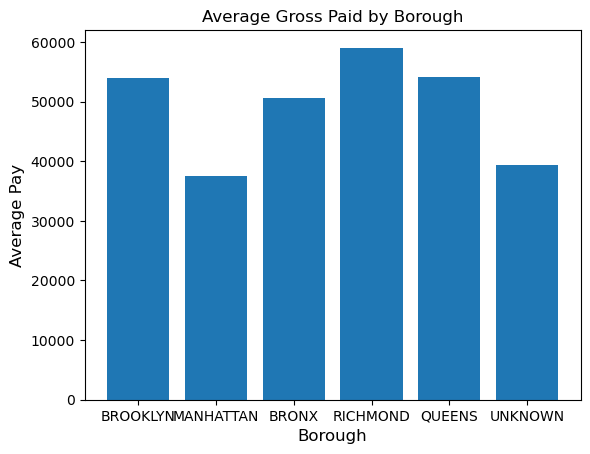

In [22]:
plt.bar(agency, avg_pay)

plt.title('Average Gross Paid by Borough')
plt.xlabel('Borough',fontsize=12)
plt.ylabel('Average Pay', fontsize=12)
plt.show()

In [27]:
max_pay=df_small_nodup['RGP_max']

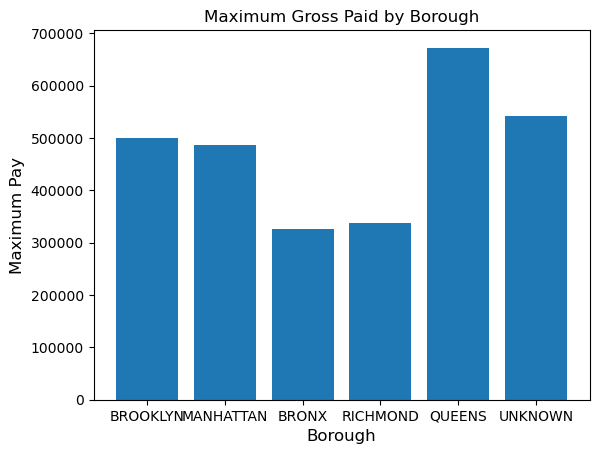

In [28]:
plt.bar(agency, max_pay)

plt.title('Maximum Gross Paid by Borough')
plt.xlabel('Borough',fontsize=12)
plt.ylabel('Maximum Pay', fontsize=12)
plt.show()

In [31]:
df_small_nodup.head()

,Work Location Borough,RGP_max,RGP_min,RGP_mean
0,BROOKLYN,500000.00,0.0,53987.193955
122,MANHATTAN,487277.63,0.0,37580.291877
650,BRONX,325311.43,0.0,50594.647732
739,RICHMOND,337807.82,0.0,59038.376414
740,QUEENS,672308.86,0.0,54045.986194


In [38]:
df_small_nodup = df_small_nodup.rename(columns={'Work Location Borough': 'boro'})

In [39]:
df_small_nodup.head()

,boro,RGP_max,RGP_min,RGP_mean
0,BROOKLYN,500000.00,0.0,53987.193955
122,MANHATTAN,487277.63,0.0,37580.291877
650,BRONX,325311.43,0.0,50594.647732
739,RICHMOND,337807.82,0.0,59038.376414
740,QUEENS,672308.86,0.0,54045.986194


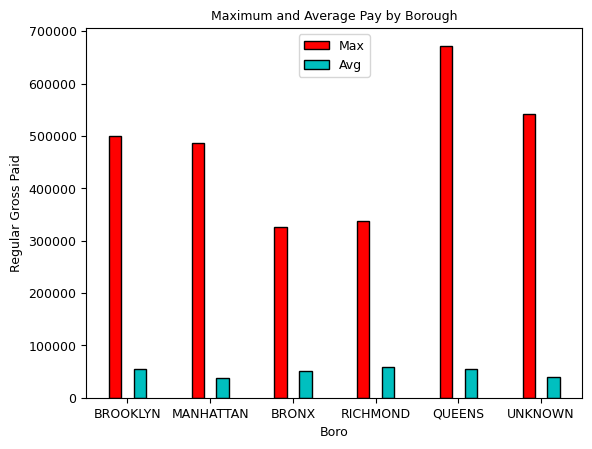

In [47]:
# Set the width of the bars
wd = 0.3
x_pos = np.arange(1, 2*len(df_small_nodup), 2)

# Plotting the multiple bar graphs on the same figure
plt.bar(x_pos, df_small_nodup.RGP_max, color='r', width=wd, edgecolor='k',
        label='Max')
#plt.bar(x_pos+wd, df_small_nodup.RGP_min, color='y', width=wd, edgecolor='k', label='Min')
plt.bar(x_pos+(wd*2), df_small_nodup.RGP_mean, color='c', width=wd, 
        edgecolor='k', label='Avg')

# Add xticks
plt.xticks(x_pos+wd, df_small_nodup.boro.values, fontsize=9)
plt.yticks(fontsize=9)
plt.title('Maximum and Average Pay by Borough', fontsize=9)
plt.xlabel('Boro', fontsize=9)
plt.ylabel('Regular Gross Paid', fontsize=9)

plt.legend(loc='upper center', fontsize=9)
plt.show()

#Observations on Regular Gross Paid by Borough in Bar Charts

- Queens has the highest Maximum Pay
- Richmond (Staten Island) has the highest Average Pay, followed by Brooklyn and Queens

#Business Question to Answer: Do employees receive the same pay in all 5 boroughs?
- Looking at Average Pay, it is possible that in general, employees are paid the same amount of money for doing the same type of work across all 5 boroughs.  The average pay amount for Brooklyn, Queens, Staten Island, and the Bronx is all within the 50,000 range.  The variation in this average could be due to specific job types having more or less presence in each borough.  Manhattan has the lowest average pay at 37,000.  This deserves additional analysis to determine if there are certain job types located in Manhattan that pull the average pay down, or if this is due to too much data with 0 values for Regular Gross Paid.
- Looking at Max Pay - it is clear that there is one specific job located in Queens which pays the most.  Brooklyn and Manhattan both have the highest pay around 500,000, while Bronx and Staten Island have highest pay around 300,000.  Overall, it will be more valuable to understand the specific job types that lead to these maximum pay amounts.
- Min pay has been excluded from this analysis because according to this data set, it will be 0 for all boroughs and this does not add any insight to the analysis.

#Additional Business Questions moving forward

- Based on this analysis, it is clear the specific job types will provide more insight to pay amounts than the location of the job.  Therefore, the next round of analysis should be to understand which job types pay the most or the least.  Then it can be determined where these jobs are located and why each borough has the average or max pay that it does.

#Additional data cleaning/data wrangling

- It is clear there is a significant amount of data with 0 values in Regular Gross Paid. Therefore in analysis moving forward it may be necessary to subset the data to include data only with a value for Regular Gross Paid.

#Hypothesis Statement

If the job Title Description has a positive relationship to the Regular Gross Paid, then Boroughs that have more higher paying job Titles will also have higher Regular Gross Paid amounts.